---
title: PA 6.1 
author: Marvin (Wenxiang) Li
format:
    html:
        toc: true
        code-fold: true
embed-resources: true        
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

- Species, island, and Sex will need to be dummified

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

- load packages

In [2]:
import pandas as pd
import palmerpenguins as p
import numpy as np
import matplotlib.pyplot as plt

In [3]:
penguins = p.load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


- create each degree

In [4]:
penguins = penguins.dropna()
penguins.loc[:, "X_2"] = penguins['bill_length_mm']**2
penguins.loc[:, "X_3"] = penguins['bill_length_mm']**3
penguins.loc[:, "X_4"] = penguins['bill_length_mm']**4
penguins.loc[:, "X_5"] = penguins['bill_length_mm']**5
penguins.loc[:, "X_6"] = penguins['bill_length_mm']**6
penguins.loc[:, "X_7"] = penguins['bill_length_mm']**7
penguins.loc[:, "X_8"] = penguins['bill_length_mm']**8
penguins.loc[:, "X_9"] = penguins['bill_length_mm']**9
penguins.loc[:, "X_10"] = penguins['bill_length_mm']**10

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49,60698.457,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15


- creat dependent and indepent variables

In [6]:
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm']]

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

- set split training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- create lm model 1

In [9]:
lr_fit_1 = LinearRegression().fit(X_train, y_train)
test_preds = lr_fit_1.predict(X_test)
train_preds = lr_fit_1.predict(X_train)

In [10]:
lr_fit_1.coef_

array([-0.08409086])

- compute MSE and R2

In [11]:
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
results = [{
        "model": "degree 1",
        "train_mse": mean_squared_error(y_train, train_preds),
        "test_mse": mean_squared_error(y_test, test_preds),
        "r2_train": r2_score(y_train, train_preds),
        "r2_test": r2_score(y_test, test_preds),
}]
model1 = pd.DataFrame(results)
print(model1)

      model  train_mse  test_mse  r2_train   r2_test
0  degree 1   3.651903  3.732114   0.05336  0.007627


- plot the graph

In [27]:
import plotnine as p9

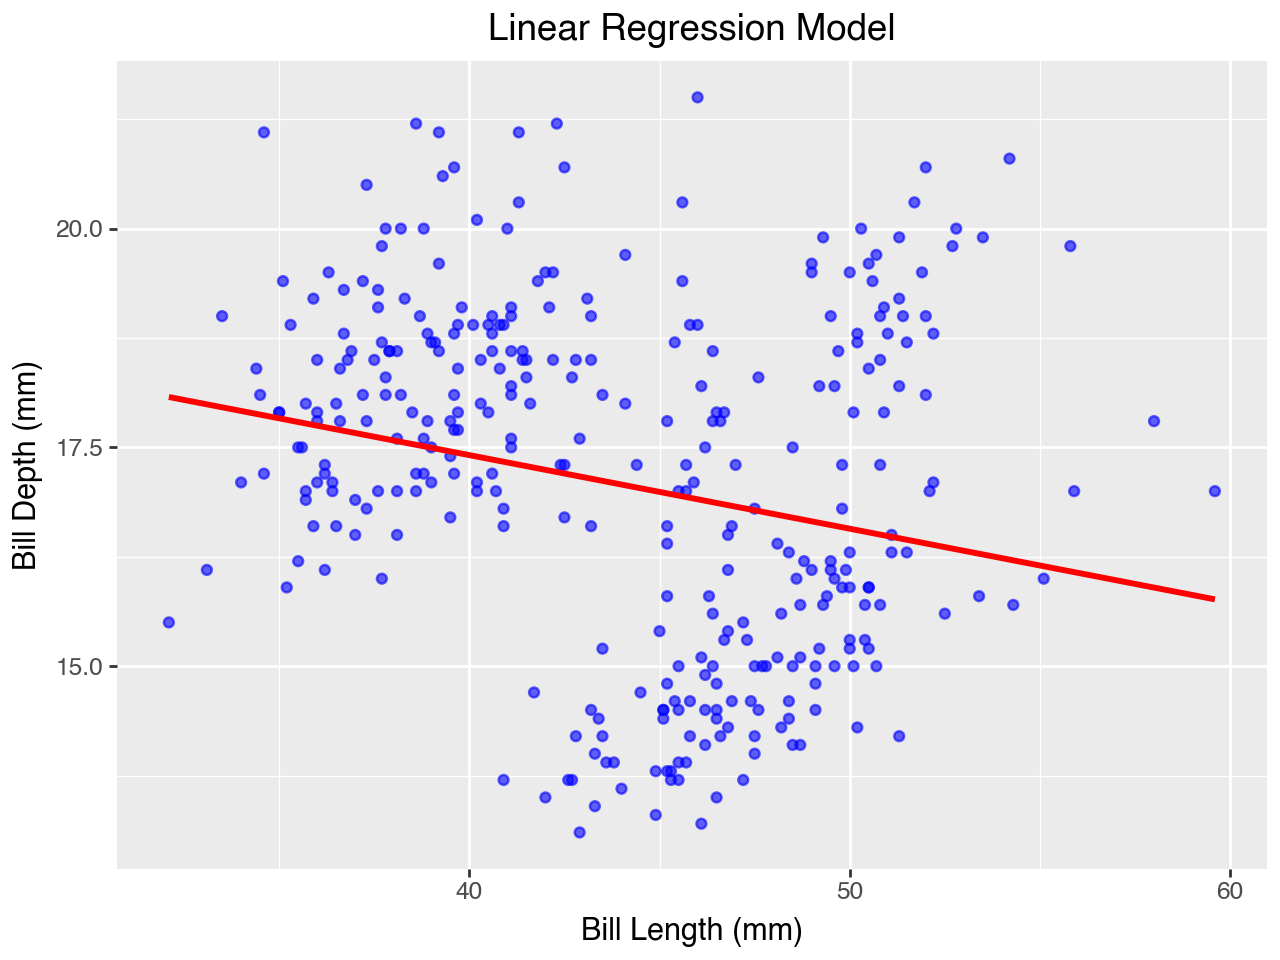

In [28]:
# Create a DataFrame with predictions for the regression line
penguins['predicted_bill_depth'] = lr_fit_1.predict(X)

# Plot with plotnine
(p9.ggplot(penguins, p9.aes(x='bill_length_mm', y='bill_depth_mm')) +
p9.geom_point(alpha=0.6, color='blue') +  # Scatter plot of actual data
p9.geom_line(p9.aes(y='predicted_bill_depth'), color='red', size=1.2) +  # Regression line
p9.labs(
        x='Bill Length (mm)',
        y='Bill Depth (mm)',
        title='Linear Regression Model'
    )   
)


- Combine codes from the simple OLS to make a function to avoid repeatition
- Polynomial feature was not used. Degree is only used for the degree column for presentation
- independent variables are still needed to be input manualy. 

In [40]:
def lrmodeltest(data, x, y, degree):
  # set container for X and y and split training and testing sets
  X = data[x]
  y = data[y]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  # setup linear regression
  model = LinearRegression()
  lr_fit_1 = model.fit(X_train, y_train)
  # prediction
  test_preds = lr_fit_1.predict(X_test)
  train_preds = lr_fit_1.predict(X_train)
  # metrics
  train_mse = mean_squared_error(y_train, train_preds)
  test_mse = mean_squared_error(y_test, test_preds)
  r2_train = r2_score(y_train, train_preds)
  r2_test = r2_score(y_test, test_preds)
  results = pd.DataFrame([{
        "model": f"degree {degree}",
        "train_mse": mean_squared_error(y_train, train_preds),
        "test_mse": mean_squared_error(y_test, test_preds),
        "r2_train": r2_score(y_train, train_preds),
        "r2_test": r2_score(y_test, test_preds),
  }])
  # plotting
  data['predicted_bill_depth'] = lr_fit_1.predict(X)

  # Plot with plotnine
  sorted_data = data.sort_values(by='bill_length_mm')
  sorted_X = sorted_data[x]
  plot = (p9.ggplot(data, p9.aes(x='bill_length_mm', y='bill_depth_mm')) +
         p9.geom_point(alpha=0.6, color='blue') +  # Scatter plot of actual data
         p9.geom_line(p9.aes(y='predicted_bill_depth'), color='red', size=1.2) +  # Regression line
         p9.labs(
        x='Bill Length (mm)',
        y='Bill Depth (mm)',
        title='Linear Regression Model'
        ) 
         )
  print(results)
  print(plot)
  return results


- Degree 2 model

      model  train_mse  test_mse  r2_train   r2_test
0  degree 2   3.472897  3.401119  0.099762  0.095639


/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_33063/3219310745.py:40: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


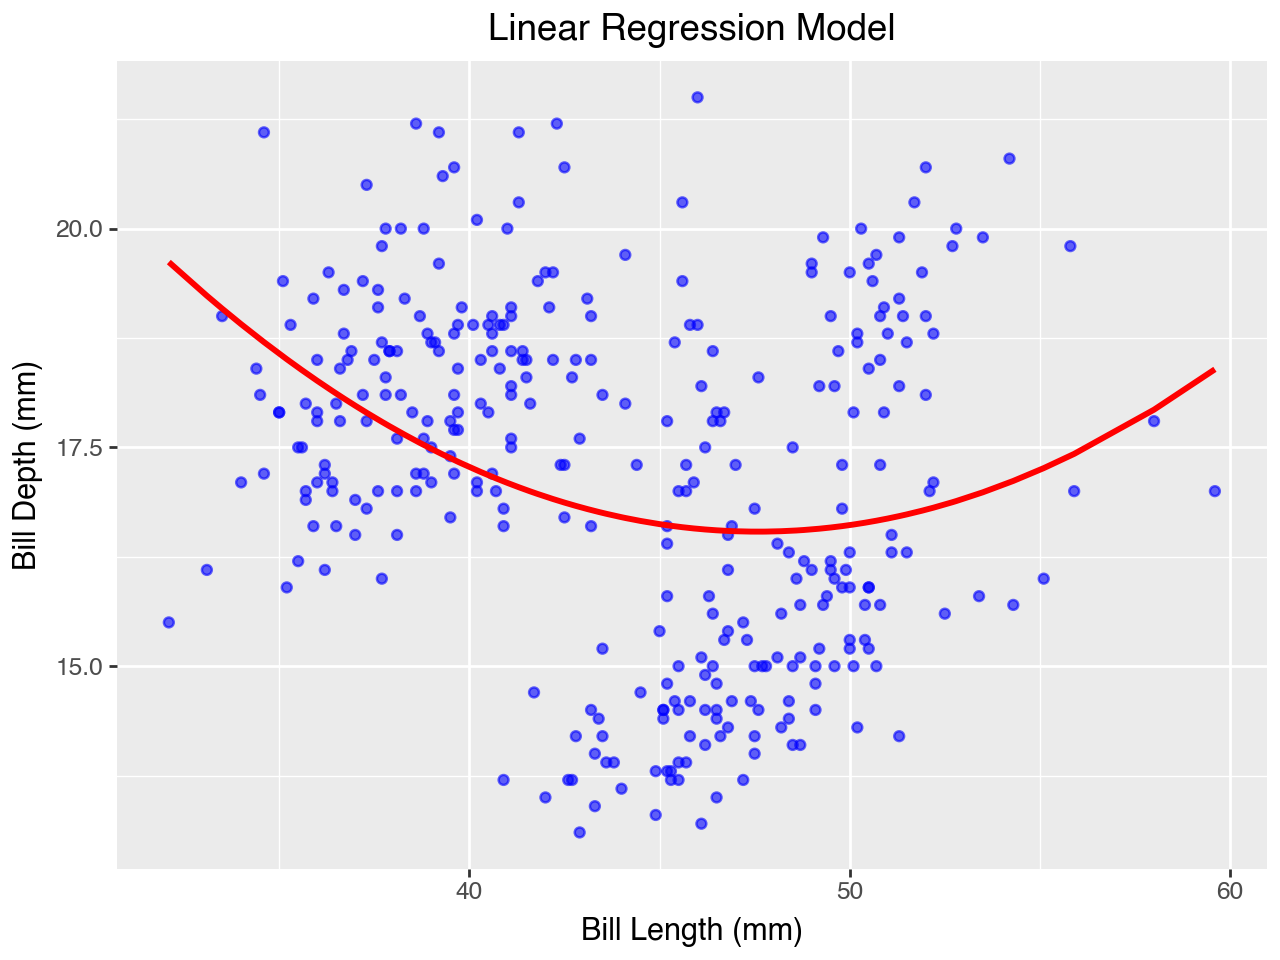

In [41]:
model2 = lrmodeltest(penguins, ['bill_length_mm', 'X_2'], 'bill_depth_mm',2)


- Degree 3 model

      model  train_mse  test_mse  r2_train   r2_test
0  degree 3   3.346217  3.384939  0.132599  0.099941


/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_33063/3219310745.py:40: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


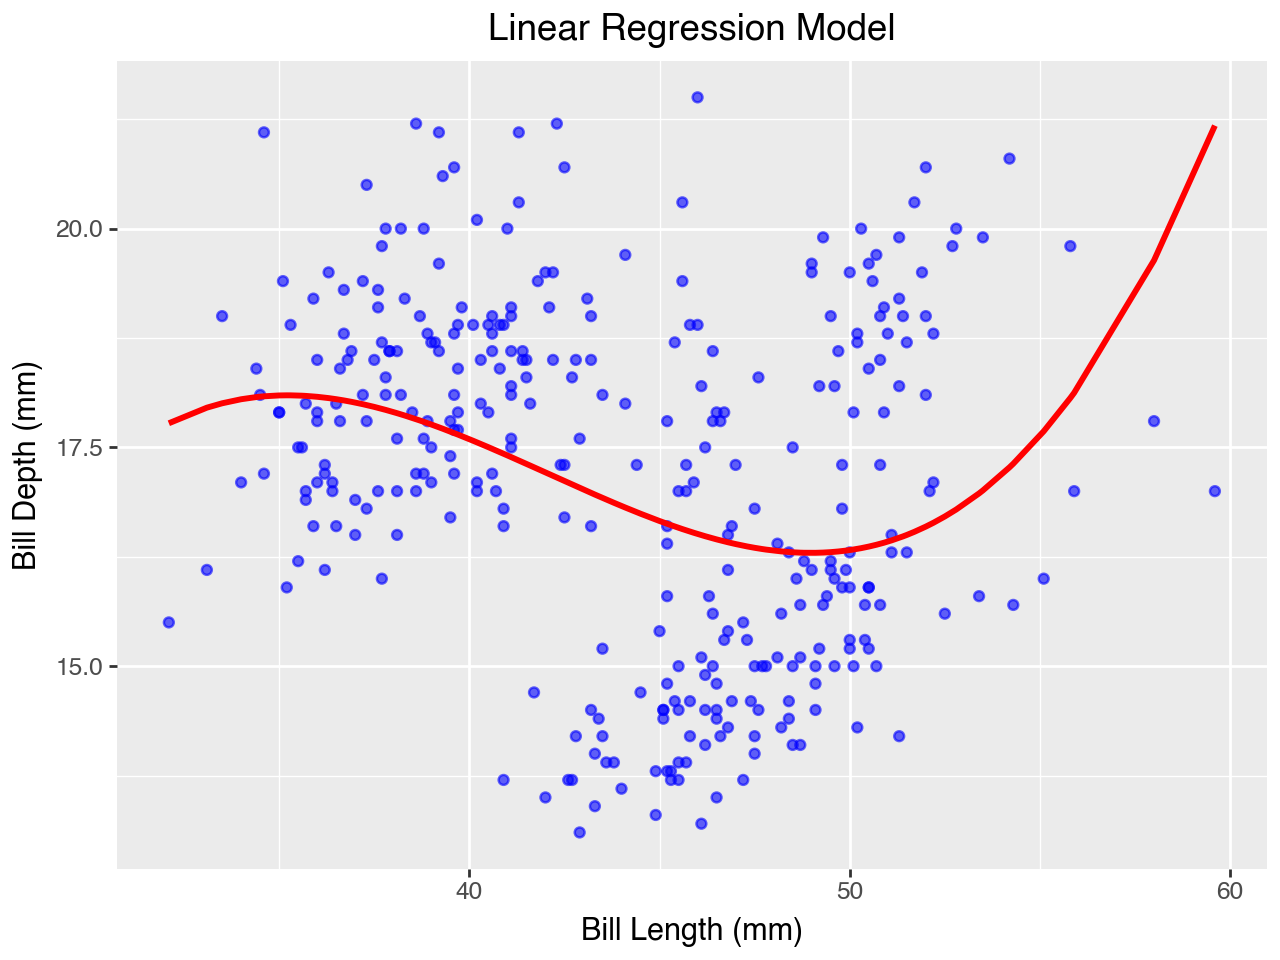

In [42]:
model3 = lrmodeltest(penguins, ['bill_length_mm','X_2','X_3'], 'bill_depth_mm', 3)


- Degree 10 model

       model  train_mse  test_mse  r2_train  r2_test
0  degree 10   2.809027  2.695552  0.271849  0.28325


/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_33063/3219310745.py:40: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


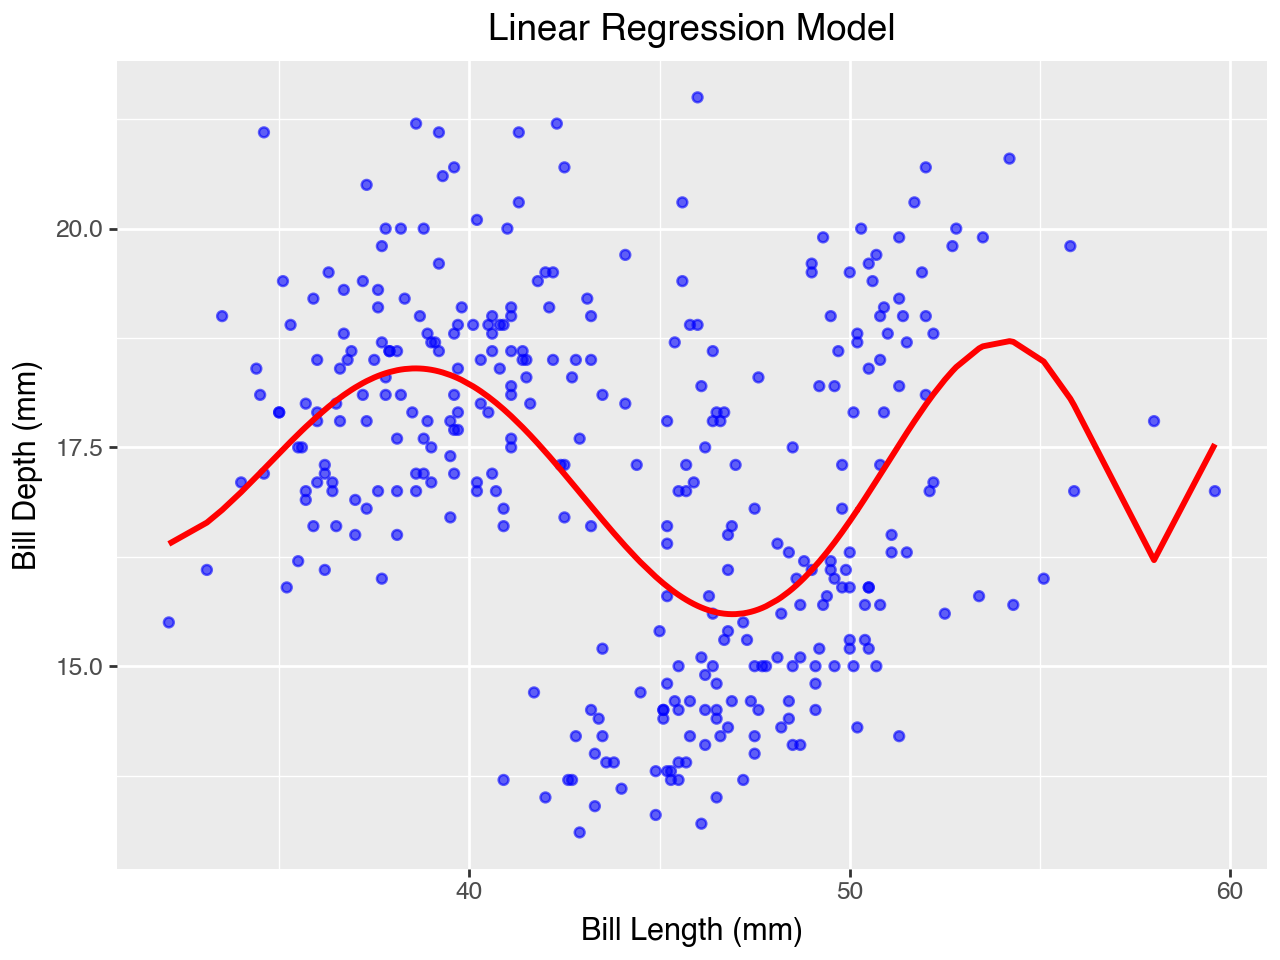

In [43]:
model10 = lrmodeltest(penguins, ['bill_length_mm', 'X_2','X_3','X_4', 'X_5', 'X_6','X_7', 'X_8', 'X_9' , 'X_10'], 'bill_depth_mm', 10)


- combine metric from all four models

In [44]:
model_selected = pd.concat([model1, model2, model3, model10], ignore_index=True)
model_selected

,model,train_mse,test_mse,r2_train,r2_test
0,degree 1,3.651903,3.732114,0.053360,0.007627
1,degree 2,3.472897,3.401119,0.099762,0.095639
2,degree 3,3.346217,3.384939,0.132599,0.099941
3,degree 10,2.809027,2.695552,0.271849,0.283250


1. Are any of the models above underfitting the data? If so, which ones and how can you tell?
- Simple linear regression, quadratic and cubic models are under fitting. They can not capture bill depth well when bill length is between 40mm to 52mm. Both metrics and plots suggest such finding.
2. Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
- The degree 10 model is overfitting after when bill length is over 52mm.
3. Which of the above models do you think fits the data best and why?
- The degree 10 model fits good between bill length 35mm to 52mm as these are the majority of length of the sample data. Both relatively low MSE and high R square support such finding. The plot also shows the degree 10 model captures bill depth when bill length is between 40mm to 52mm better. Essentially, this data set consists of three different species, so it would be more accurate to use a dummy variable to seperate them.